# <span style = "color:coral"> Weather Prediciton </span>

Find the dataset <a href = 'https://www.kaggle.com/datasets/ananthr1/weather-prediction'>here </a>

***

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read the dataset

In [2]:
df = pd.read_csv('seattle-weather.csv')

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


### Check info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


### View basic statistical information

In [5]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


### Convert the date column to datetime format

In [7]:
df['date'] = pd.to_datetime(df['date'])

### Let the date column only include the month

In [24]:
df['date'] = df['date'].dt.month

# Exploratory Data Analysis

### Countplot of weather condition

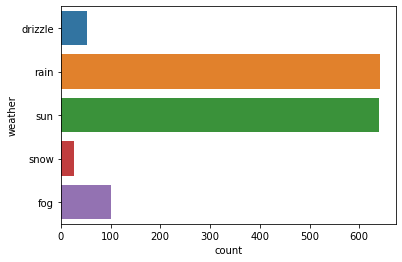

In [23]:
sns.countplot(y = df['weather'])
plt.show()

### Number of times each weather condition occured in each months

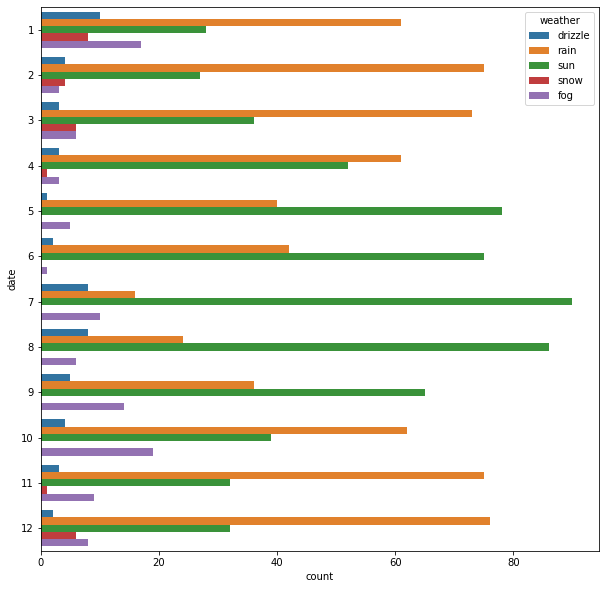

In [15]:
plt.figure(figsize = (10,10))
sns.countplot( y = df['date'].dt.month, hue = df['weather'])
plt.show()

### Number of times each weather condition occured in each year

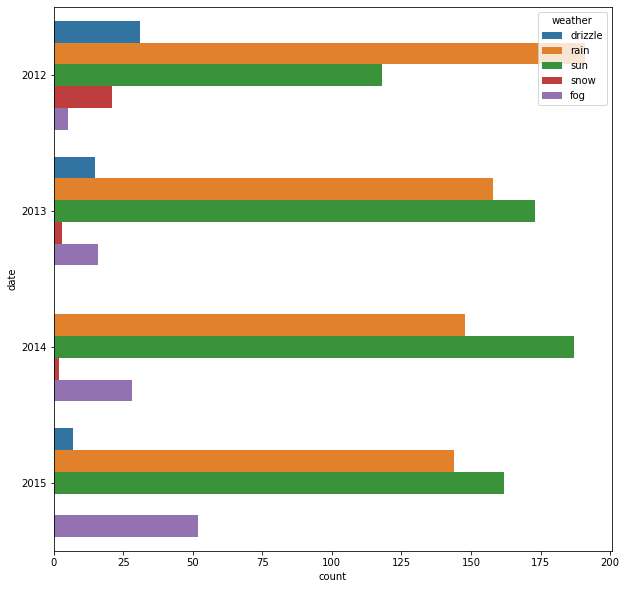

In [16]:
plt.figure(figsize = (10,10))
sns.countplot( y = df['date'].dt.year, hue = df['weather'])
plt.show()

### Plot distribution plots of each features

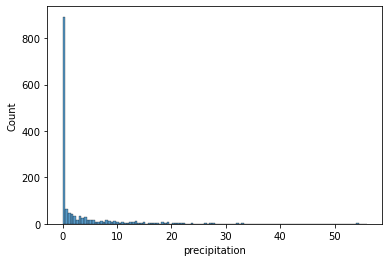

In [19]:
sns.histplot(df['precipitation'])
plt.show()

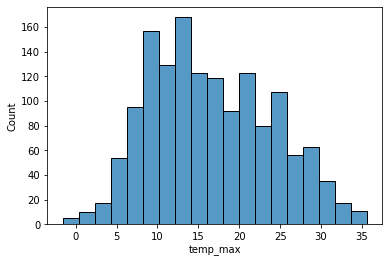

In [20]:
sns.histplot(df['temp_max'])
plt.show()

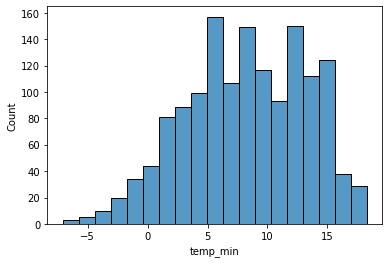

In [21]:
sns.histplot(df['temp_min'])
plt.show()

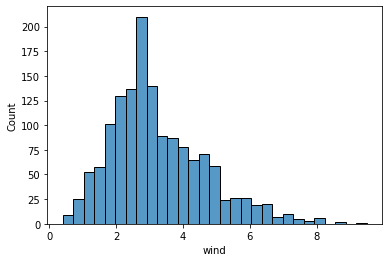

In [22]:
sns.histplot(df['wind'])
plt.show()

### Split the dataset into Input & Target Variables

In [25]:
X = df.drop(columns = ['weather'])
y = df['weather']

### Split the dataset into Training & Testing set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

### Create Random Forest Classifier model

In [27]:
params = {"n_estimators":list(range(1,100))}

In [28]:
model = GridSearchCV(RandomForestClassifier(), params, cv = 3, scoring = 'accuracy')

In [29]:
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [30]:
model.score(X_train, y_train)

1.0

### Make predictions with X_test

In [31]:
y_pred = model.predict(X_test)

### Evaluate the model

In [32]:
accuracy_score(y_test,y_pred)

0.8395904436860068

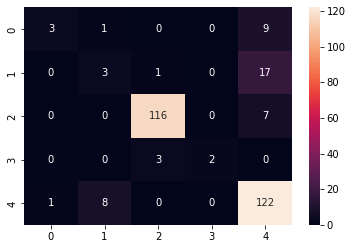

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     drizzle       0.75      0.23      0.35        13
         fog       0.25      0.14      0.18        21
        rain       0.97      0.94      0.95       123
        snow       1.00      0.40      0.57         5
         sun       0.79      0.93      0.85       131

    accuracy                           0.84       293
   macro avg       0.75      0.53      0.58       293
weighted avg       0.83      0.84      0.82       293



***